In [1]:
# importing pandas for handing csv and numpy for numerical manipulation
import pandas as pd
import numpy as np

In [2]:
#imprting dataset
data=pd.read_csv('Fraud.csv')

In [3]:
#basic feature and information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
# top 5 dataset value to check if the dataset has been loaded properly
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
##pre processing

#first we need to check if any of the coulmn has null value as we can see there is no null value so we dont need to handle this 
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
# we will use z-score function of scipy library 
from scipy import stats

In [7]:
# we are using all column for z score except step as step is a unit of time in the real world and is not related for fraud case
#is fraud is our target variable
z = np.abs(stats.zscore(data[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]))
print(z)

[[2.81559923e-01 2.29810037e-01 2.37621696e-01 3.23813895e-01
  3.33411405e-01]
 [2.94767262e-01 2.81359380e-01 2.85812295e-01 3.23813895e-01
  3.33411405e-01]
 [2.97554804e-01 2.88653782e-01 2.92441707e-01 3.23813895e-01
  3.33411405e-01]
 ...
 [1.01539526e+01 1.89649113e+00 2.92441707e-01 3.03665258e-01
  1.40302700e+00]
 [1.10976490e+00 5.58104668e-03 2.92441707e-01 3.23813895e-01
  3.33411405e-01]
 [1.10976490e+00 5.58104668e-03 2.92441707e-01 1.59138312e+00
  1.66981230e+00]]


In [8]:
#keeping the threshold 3 to detect outlier 
threshold = 3
print(np.where(z > 3))

(array([     84,      88,      89, ..., 6362599, 6362616, 6362617],
      dtype=int64), array([4, 4, 4, ..., 0, 0, 0], dtype=int64))


In [9]:
#printing particular outlier we can check other as well from above value 
print(z[84][4])

4.883935818423778


In [10]:

#we have to remove outlier to get clean data 
data_new = data[(z < 3).all(axis=1)]

In [11]:
data.shape

(6362620, 11)

In [12]:
data_new.shape

(6090589, 11)

In [13]:
# while running logistic regression ML cannot understand word hence we will convert it into numerical 
dummy_type=pd.get_dummies(data_new['type'])
dummy_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6090589 entries, 0 to 6362619
Data columns (total 5 columns):
 #   Column    Dtype
---  ------    -----
 0   CASH_IN   uint8
 1   CASH_OUT  uint8
 2   DEBIT     uint8
 3   PAYMENT   uint8
 4   TRANSFER  uint8
dtypes: uint8(5)
memory usage: 75.5 MB


In [14]:
#appending data into new dataframe 
data_new=pd.concat([data_new,dummy_type],axis=1)

In [15]:
data_new['isFraud'].value_counts()

0    6084104
1       6485
Name: isFraud, dtype: int64

In [16]:
fraud= data_new[data_new.isFraud == 1]
legit= data_new[data_new.isFraud == 0]

In [17]:
# check data avg. for fraud and legit 
data_new.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,,,,,,,,
0,242.839546,144631.029706,454638.850957,474521.117296,818627.120285,907732.311040,0.000000,0.200797,0.361156,0.006695,0.35362,0.077731
1,366.257209,465158.785314,463726.430891,458.779644,399102.775224,634305.955593,0.000463,0.000000,0.499306,0.000000,0.00000,0.500694


In [18]:
# create sample dataset to visualize
from random import sample
legit_sample = legit.sample(n=6485)

In [19]:
balanced_data= pd.concat([legit_sample, fraud], axis= 0)

In [20]:
balanced_data['isFraud'].value_counts()

1    6485
0    6485
Name: isFraud, dtype: int64

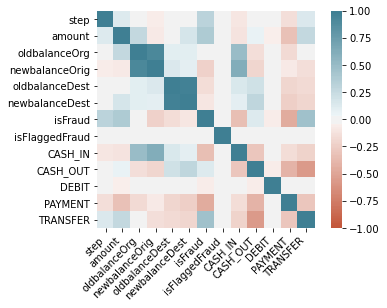

In [21]:
#we will visualize balanced datase for feature selection as imbalance dataset might not give correct feature 
import seaborn as sns
corrMatrix=balanced_data.corr()

ax = sns.heatmap(
    corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# we can see oldbalanceorg is same as newbalanceorg
# we can also see oldbalancedest is same as newbalancedest 
# we can use anyone one from both as predictor 

In [22]:
# we are using logistic regression as it is simple and for cases we need our prediction in 0 or 1. as fraud or legit 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [27]:
# we are dividing dataset with 70% for tarin and 30 for test 
# x is input feature use to predict
# y is output predetction
x = data_new[['step','amount','oldbalanceOrg','oldbalanceDest','CASH_IN','CASH_OUT','DEBIT','PAYMENT','TRANSFER']]
y = data_new["isFraud"]

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.30, random_state = 0)

In [28]:

history=lr.fit(X_train,Y_train)

LogisticRegression()

In [29]:
# train datascore 
lr.score(X_train,Y_train)

0.9989379398472398

In [30]:
#test datascore 
lr.score(X_test,Y_test)

0.9989289488648335

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

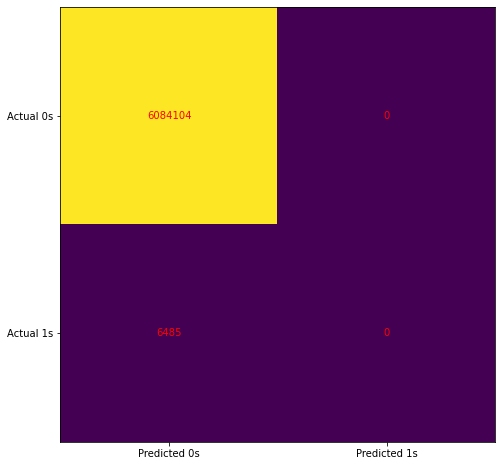

In [36]:
cm = confusion_matrix(y, lr.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()